## Now can we train the RNN model?

In [1]:
import numpy as np
import pandas as pd
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, GRU
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Requirements : <br/>Version of TensorFlow : 2.3.1<br/>Version of Keras : 2.4.3

In [2]:
print("Version of TensorFlow :", tf.__version__)
print("Version of Keras :", keras.__version__)

Version of TensorFlow : 2.3.1
Version of Keras : 2.4.3


## Import data & Regularize?

In [3]:
kinds = 'Additional'
tier = 'CHALLENGER'

#"""
# Additional
data = pd.read_pickle("./RNN Real Dataset/{0}/{1}/Train/Data/{1}{2}.pkl".format(kinds, tier, 10))
target = pd.read_pickle("./RNN Real Dataset/{0}/{1}/Train/Target/{1}{2}.pkl".format(kinds, tier, 10))
#"""

"""
# Original
data = pd.read_pickle("./RNN Real Dataset/{0}/{1}/Data/{1}{2}.pkl".format(kinds, tier, 10))
target = pd.read_pickle("./RNN Real Dataset/{0}/{1}/Target/{1}{2}.pkl".format(kinds, tier, 10))
"""

'\n# Original\ndata = pd.read_pickle("./RNN Real Dataset/{0}/{1}/Data/{1}{2}.pkl".format(kinds, tier, 10))\ntarget = pd.read_pickle("./RNN Real Dataset/{0}/{1}/Target/{1}{2}.pkl".format(kinds, tier, 10))\n'

## Build RNN model(GRU)

In [4]:
start, end = 2, 50
mod = sys.modules[__name__]
numFeatures = data[0].shape[1] # 24
############### Build 3-layer RNN model ###############
for tl in range(start, end+1): # timeline from 1 minute to 50 minute.
    setattr(mod, "RNN{}".format(tl), Sequential([
    GRU(44, return_sequences=False, input_shape=(tl, numFeatures)), Activation('relu'),
    #GRU(numFeatures, return_sequences=True), Activation('relu'),
    #GRU(numFeatures, return_sequences=False, Activation('relu')),
    Dense(2, activation='softmax')
    ]))
    eval("RNN{}".format(tl)).compile(loss='mean_squared_error', optimizer='sgd')
    print(" >> Processing : RNN{}".format(tl))
    print(eval("RNN{}".format(tl)).summary())
print("\nAll model has been setup")
scaler = StandardScaler()
#######################################################

 >> Processing : RNN2
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 44)                9240      
_________________________________________________________________
activation (Activation)      (None, 44)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 90        
Total params: 9,330
Trainable params: 9,330
Non-trainable params: 0
_________________________________________________________________
None
 >> Processing : RNN3
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 44)                9240      
_________________________________________________________________
activation_1 (Activation)    (None, 44)          

 >> Processing : RNN14
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_12 (GRU)                 (None, 44)                9240      
_________________________________________________________________
activation_12 (Activation)   (None, 44)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 90        
Total params: 9,330
Trainable params: 9,330
Non-trainable params: 0
_________________________________________________________________
None
 >> Processing : RNN15
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_13 (GRU)                 (None, 44)                9240      
_________________________________________________________________
activation_13 (Activation)   (None, 44)    

 >> Processing : RNN25
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_23 (GRU)                 (None, 44)                9240      
_________________________________________________________________
activation_23 (Activation)   (None, 44)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 90        
Total params: 9,330
Trainable params: 9,330
Non-trainable params: 0
_________________________________________________________________
None
 >> Processing : RNN26
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_24 (GRU)                 (None, 44)                9240      
_________________________________________________________________
activation_24 (Activation)   (None, 44)    

 >> Processing : RNN37
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_35 (GRU)                 (None, 44)                9240      
_________________________________________________________________
activation_35 (Activation)   (None, 44)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 90        
Total params: 9,330
Trainable params: 9,330
Non-trainable params: 0
_________________________________________________________________
None
 >> Processing : RNN38
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_36 (GRU)                 (None, 44)                9240      
_________________________________________________________________
activation_36 (Activation)   (None, 44)    

 >> Processing : RNN48
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_46 (GRU)                 (None, 44)                9240      
_________________________________________________________________
activation_46 (Activation)   (None, 44)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 2)                 90        
Total params: 9,330
Trainable params: 9,330
Non-trainable params: 0
_________________________________________________________________
None
 >> Processing : RNN49
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_47 (GRU)                 (None, 44)                9240      
_________________________________________________________________
activation_47 (Activation)   (None, 44)    

## Training

#### Original

In [ ]:
# Original
kinds = 'Original'
print("{} {} start".format(kinds, tier))
for m in range(start, end+1):
    print(" >> Processing : RNN_{} training start".format(m))
    data = pd.read_pickle("RNN Real Dataset/{0}/{1}/Data/{1}{2}.pkl".format(kinds, tier, m))
    targetVector = pd.read_pickle("RNN Real Dataset/{0}/{1}/Target/{1}{2}.pkl".format(kinds, tier, m))
    # process data
    for idx in range(data.shape[0]):
        sample = data[idx]
        sample = scaler.fit_transform(sample)
        data[idx] = sample
    print("data.shape: {}".format(data.shape))
    # process target
    softmaxTargetVector = []
    for blueWin in targetVector:
        if blueWin == 1:
            softmaxTargetVector.append([1, 0])
        else:
            softmaxTargetVector.append([0, 1])
    softmaxTargetVector = np.array(softmaxTargetVector)
    target = softmaxTargetVector.reshape(-1, 2)
    print("target.shape: {}".format(target.shape))
    eval("RNN{}".format(m)).fit(data, target, epochs=2, verbose=1)

#### Additional

In [5]:
# Additional
kinds = 'Additional'
print("{} {} start".format(kinds, tier))
for m in range(start, end+1):
    print(" >> Processing : RNN_{} training start".format(m))
    data = pd.read_pickle("RNN Real Dataset/{0}/{1}/Train/Data/{1}{2}.pkl".format(kinds, tier, m))
    targetVector = pd.read_pickle("RNN Real Dataset/{0}/{1}/Train/Target/{1}{2}.pkl".format(kinds, tier, m))
    # process data
    for idx in range(data.shape[0]):
        sample = data[idx]
        sample = scaler.fit_transform(sample)
        data[idx] = sample
    print("data.shape: {}".format(data.shape))
    # process target
    softmaxTargetVector = []
    for blueWin in targetVector:
        if blueWin == 1:
            softmaxTargetVector.append([1, 0])
        else:
            softmaxTargetVector.append([0, 1])
    softmaxTargetVector = np.array(softmaxTargetVector)
    target = softmaxTargetVector.reshape(-1, 2)
    print("target.shape: {}".format(target.shape))
    eval("RNN{}".format(m)).fit(data, target, epochs=8, verbose=1)

Additional CHALLENGER start
 >> Processing : RNN_2 training start
data.shape: (32000, 2, 24)
target.shape: (32000, 2)
Epoch 1/8
1000/1000 [==============================] - 1s 727us/step - loss: 0.2505
Epoch 2/8
1000/1000 [==============================] - 1s 718us/step - loss: 0.2501
Epoch 3/8
1000/1000 [==============================] - 1s 724us/step - loss: 0.2499
Epoch 4/8
1000/1000 [==============================] - 1s 708us/step - loss: 0.2497
Epoch 5/8
1000/1000 [==============================] - 1s 708us/step - loss: 0.2496
Epoch 6/8
1000/1000 [==============================] - 1s 705us/step - loss: 0.2495
Epoch 7/8
1000/1000 [==============================] - 1s 697us/step - loss: 0.2494
Epoch 8/8
1000/1000 [==============================] - 1s 705us/step - loss: 0.2492
 >> Processing : RNN_3 training start
data.shape: (32000, 3, 24)
target.shape: (32000, 2)
Epoch 1/8
1000/1000 [==============================] - 1s 830us/step - loss: 0.2484
Epoch 2/8
1000/1000 [===============

data.shape: (31262, 13, 24)
target.shape: (31262, 2)
Epoch 1/8
977/977 [==============================] - 3s 3ms/step - loss: 0.1715
Epoch 2/8
977/977 [==============================] - 3s 3ms/step - loss: 0.1629
Epoch 3/8
977/977 [==============================] - 3s 3ms/step - loss: 0.1623
Epoch 4/8
977/977 [==============================] - 3s 3ms/step - loss: 0.1619
Epoch 5/8
977/977 [==============================] - 3s 3ms/step - loss: 0.1615
Epoch 6/8
977/977 [==============================] - 3s 3ms/step - loss: 0.1612
Epoch 7/8
977/977 [==============================] - 3s 3ms/step - loss: 0.1610
Epoch 8/8
977/977 [==============================] - 3s 3ms/step - loss: 0.1608
 >> Processing : RNN_14 training start
data.shape: (31011, 14, 24)
target.shape: (31011, 2)
Epoch 1/8
970/970 [==============================] - 3s 4ms/step - loss: 0.1642
Epoch 2/8
970/970 [==============================] - 3s 4ms/step - loss: 0.1567
Epoch 3/8
970/970 [==============================] - 3s

556/556 [==============================] - 3s 6ms/step - loss: 0.1270
Epoch 3/8
556/556 [==============================] - 3s 5ms/step - loss: 0.1254
Epoch 4/8
556/556 [==============================] - 3s 5ms/step - loss: 0.1246
Epoch 5/8
556/556 [==============================] - 3s 5ms/step - loss: 0.1240
Epoch 6/8
556/556 [==============================] - 3s 5ms/step - loss: 0.1235
Epoch 7/8
556/556 [==============================] - 3s 5ms/step - loss: 0.1230
Epoch 8/8
556/556 [==============================] - 3s 5ms/step - loss: 0.1227
 >> Processing : RNN_25 training start
data.shape: (16009, 25, 24)
target.shape: (16009, 2)
Epoch 1/8
501/501 [==============================] - 3s 6ms/step - loss: 0.1604
Epoch 2/8
501/501 [==============================] - 3s 5ms/step - loss: 0.1289
Epoch 3/8
501/501 [==============================] - 3s 5ms/step - loss: 0.1260
Epoch 4/8
501/501 [==============================] - 3s 5ms/step - loss: 0.1244
Epoch 5/8
501/501 [===================

86/86 [==============================] - 1s 7ms/step - loss: 0.1623
Epoch 5/8
86/86 [==============================] - 1s 7ms/step - loss: 0.1588
Epoch 6/8
86/86 [==============================] - 1s 7ms/step - loss: 0.1561
Epoch 7/8
86/86 [==============================] - 1s 7ms/step - loss: 0.1541
Epoch 8/8
86/86 [==============================] - 1s 7ms/step - loss: 0.1523
 >> Processing : RNN_36 training start
data.shape: (2105, 36, 24)
target.shape: (2105, 2)
Epoch 1/8
66/66 [==============================] - 1s 8ms/step - loss: 0.2094
Epoch 2/8
66/66 [==============================] - 1s 8ms/step - loss: 0.1821
Epoch 3/8
66/66 [==============================] - 1s 8ms/step - loss: 0.1699
Epoch 4/8
66/66 [==============================] - 1s 8ms/step - loss: 0.1632
Epoch 5/8
66/66 [==============================] - 1s 8ms/step - loss: 0.1589
Epoch 6/8
66/66 [==============================] - 1s 8ms/step - loss: 0.1559
Epoch 7/8
66/66 [==============================] - 1s 8ms/step

Epoch 1/8
2/2 [==============================] - 0s 8ms/step - loss: 0.2755
Epoch 2/8
2/2 [==============================] - 0s 6ms/step - loss: 0.2732
Epoch 3/8
2/2 [==============================] - 0s 6ms/step - loss: 0.2707
Epoch 4/8
2/2 [==============================] - 0s 6ms/step - loss: 0.2684
Epoch 5/8
2/2 [==============================] - 0s 5ms/step - loss: 0.2664
Epoch 6/8
2/2 [==============================] - 0s 6ms/step - loss: 0.2643
Epoch 7/8
2/2 [==============================] - 0s 6ms/step - loss: 0.2622
Epoch 8/8
2/2 [==============================] - 0s 6ms/step - loss: 0.2601
 >> Processing : RNN_48 training start
data.shape: (33, 48, 24)
target.shape: (33, 2)
Epoch 1/8
2/2 [==============================] - 0s 8ms/step - loss: 0.2725
Epoch 2/8
2/2 [==============================] - 0s 6ms/step - loss: 0.2704
Epoch 3/8
2/2 [==============================] - 0s 6ms/step - loss: 0.2638
Epoch 4/8
2/2 [==============================] - 0s 5ms/step - loss: 0.2621
Ep

## Test

In [6]:
data = pd.read_pickle("RNN Real Dataset/{0}/{1}/Test/Data/{1}{2}.pkl".format(kinds, tier, 15))
targetVector = pd.read_pickle("RNN Real Dataset/{0}/{1}/Test/Target/{1}{2}.pkl".format(kinds, tier, 15))
# process data
for idx in range(data.shape[0]):
    sample = data[idx]
    sample = scaler.fit_transform(sample)
    data[idx] = sample
y_pred = RNN15.predict(data)
print("y_pred[:5]: {} / targetVector[:5]: {}".format(y_pred[:5], targetVector[:5]))

y_pred[:5]: [[0.8535123  0.14648773]
 [0.93935645 0.06064357]
 [0.22482069 0.7751793 ]
 [0.9486816  0.05131841]
 [0.8582071  0.14179291]] / targetVector[:5]: [1, 1, 1, 1, 1]


In [ ]:
len(targetVector)

In [7]:
acc_lst = []
for m in range(2, 51):
    print(" >> Processing : RNN_{} test start".format(m))
    data = pd.read_pickle("RNN Real Dataset/{0}/{1}/Test/Data/{1}{2}.pkl".format(kinds, tier, m))
    targetVector = pd.read_pickle("RNN Real Dataset/{0}/{1}/Test/Target/{1}{2}.pkl".format(kinds, tier, m))
    setattr(mod, "pred{}".format(m), [])
    for idx in range(data.shape[0]):
        sample = data[idx]
        sample = scaler.fit_transform(sample)
        data[idx] = sample
    y_pred = eval("RNN{}".format(m)).predict(data)
    for i in range(len(y_pred)):
        bwRate, rwRate = y_pred[i]
        if bwRate > 0.5: pred = 1
        else: pred = 0
        eval("pred{}".format(m)).append(pred)
    y_pred = eval("pred{}".format(m))
    y_test = targetVector
    acc = accuracy_score(y_test, y_pred)
    acc_lst.append(acc)

 >> Processing : RNN_2 test start
 >> Processing : RNN_3 test start
 >> Processing : RNN_4 test start
 >> Processing : RNN_5 test start
 >> Processing : RNN_6 test start
 >> Processing : RNN_7 test start
 >> Processing : RNN_8 test start
 >> Processing : RNN_9 test start
 >> Processing : RNN_10 test start
 >> Processing : RNN_11 test start
 >> Processing : RNN_12 test start
 >> Processing : RNN_13 test start
 >> Processing : RNN_14 test start
 >> Processing : RNN_15 test start
 >> Processing : RNN_16 test start
 >> Processing : RNN_17 test start
 >> Processing : RNN_18 test start
 >> Processing : RNN_19 test start
 >> Processing : RNN_20 test start
 >> Processing : RNN_21 test start
 >> Processing : RNN_22 test start
 >> Processing : RNN_23 test start
 >> Processing : RNN_24 test start
 >> Processing : RNN_25 test start
 >> Processing : RNN_26 test start
 >> Processing : RNN_27 test start
 >> Processing : RNN_28 test start
 >> Processing : RNN_29 test start
 >> Processing : RNN_30 test

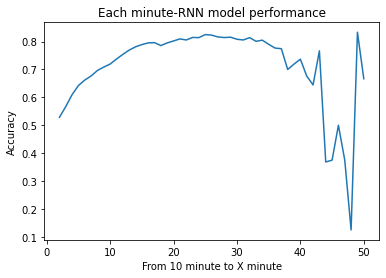

In [8]:
import matplotlib.pyplot as plt

x_axis = list(range(start, end+1))
fig = plt.figure()
fig.patch.set_facecolor("white")
plt.plot(x_axis, acc_lst)
plt.xlabel("From 10 minute to X minute")
plt.ylabel("Accuracy")
plt.title("Each minute-RNN model performance")
plt.show()

In [9]:
max(acc_lst)

0.8333333333333334

In [10]:
acc_lst[:5]

[0.5283960092095165,
 0.5669608595548734,
 0.6097467382962395,
 0.6423904688700999,
 0.6619444983504754]

In [11]:
acc_lst[33:]

[0.7901234567901234,
 0.7766990291262136,
 0.7743362831858407,
 0.7,
 0.7191780821917808,
 0.7368421052631579,
 0.6764705882352942,
 0.6444444444444445,
 0.7666666666666667,
 0.3684210526315789,
 0.375,
 0.5,
 0.375,
 0.125,
 0.8333333333333334,
 0.6666666666666666]

In [13]:
data = pd.read_pickle("./RNN Dataset/{0}/Test/Data/{0}{1}.pkl".format(tier, 1))
target = pd.read_pickle("./RNN Dataset/{0}/Test/Target/{0}{1}.pkl".format(tier, 1))

In [14]:
for i in range(data.shape[0]):
    endTime = data[i].shape[0]
    if endTime == 30: # 경기 시간이 30분인 매치 탐색
        index = i
        sample = data[i]
        break
print(target[index])

1


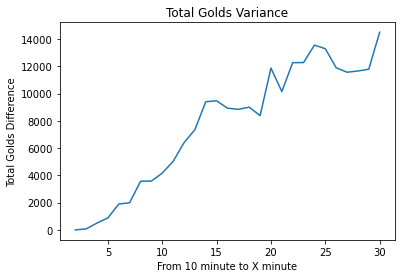

In [15]:
totalGolds = []
for tl in range(start, endTime+1):
    totalGolds.append(sample[tl-1][0])
x_axis = list(range(start, endTime+1))
fig = plt.figure()
fig.patch.set_facecolor("white")
plt.plot(x_axis, totalGolds)
plt.xlabel("From 10 minute to X minute")
plt.ylabel("Total Golds Difference")
plt.title("Total Golds Variance")
plt.show()

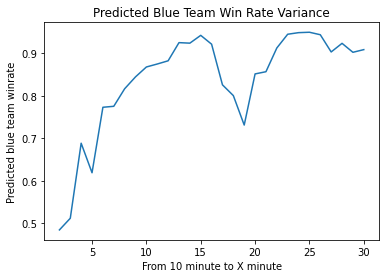

In [16]:
y_pred = []
for tl in range(start, endTime+1):
    input_data = sample[:tl, :]
    input_data = scaler.fit_transform(input_data)
    timestamps, input_dim = input_data.shape
    input_data = input_data.reshape(1, timestamps, input_dim)
    pred = eval("RNN{}".format(tl)).predict(input_data)
    y_pred.append(pred[0][0])
x_axis = list(range(start, endTime+1)) # 2 ~ 30, 29개. sample의 shape은 (30, 22)
fig = plt.figure()
fig.patch.set_facecolor("white")
plt.plot(x_axis, y_pred)
plt.xlabel("From 10 minute to X minute")
plt.ylabel("Predicted blue team winrate")
plt.title("Predicted Blue Team Win Rate Variance")
plt.show()

In [18]:
columns = [i for i in range(1, 31)]
firstPred = [0.5]
win_rates = firstPred+y_pred
win_rates = list(map(lambda x:100*x, win_rates))
y_pred_df = pd.DataFrame([win_rates], columns=columns)
y_pred_df

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,50.0,48.409718,51.157326,68.843418,61.88122,77.314931,77.544719,81.67572,84.479916,86.809951,...,85.696936,91.287708,94.528812,94.902396,94.998866,94.41089,90.352422,92.384595,90.271878,90.901887


In [19]:
def getfboutline(win_rates):
    # 우선 매 분마다 win_rates의 변화도를 구한다
    length = len(win_rates)
    differentials = []
    for idx in range(length-1):
        differentials.append(win_rates[idx+1]-win_rates[idx])
    totalFeedbacks, alpha = divmod(length, 5)
    if totalFeedbacks == 0:
        feedback_num = [0, 0]
        feedback_points = 0
    else: # itvidx: interval index
        pFeedbackNum, nFeedbackNum = 0, 0
        feedback_points = {} # key : point(timestamp)
        maxDifferentials = [] # 각 구간의 최고 변화율을 담는다.
        for itvidx in range(totalFeedbacks):
            if itvidx == 0:
                lower, upper = 0, 4
            else:
                lower, upper = 5*itvidx-1, 5*(itvidx+1)-1
            targetInterval = differentials[lower:upper]
            absInterval = list(map(abs, targetInterval))
            maxDifferential = max(absInterval)
            maxDifferentials.append(maxDifferential)
            point = absInterval.index(maxDifferential)
            delta = round(targetInterval[point], 1)
            if delta > 0: # 긍정적 피드백
                feedback_points[str(point+lower+1)] = {
                    "win_rate":win_rates[point+lower],
                    "delta":delta
                }
                pFeedbackNum += 1
            elif delta < 0: # 부정적 피드백
                feedback_points[str(point+lower+1)] = {
                    "win_rate":win_rates[point+lower],
                    "delta":delta
                }
                nFeedbackNum += 1
        if alpha != 0: # 5분씩 나눈 구간 후 마지막 구간
            lower = 5*(totalFeedbacks)-1
            targetInterval = differentials[lower:]
            absInterval = list(map(abs, targetInterval))
            maxDifferential = max(absInterval)
            if maxDifferential >= np.median(maxDifferentials):
                point = absInterval.index(maxDifferential)
                delta = round(targetInterval[point], 1)
                if delta > 0:
                    feedback_points[str(point+lower+1)] = {
                    "win_rate":win_rates[point+lower],
                    "delta":delta
                    }
                    pFeedbackNum += 1
                elif delta < 0:
                    feedback_points[str(point+lower+1)] = {
                    "win_rate":win_rates[point+lower],
                    "delta":delta
                    }
                    nFeedbackNum += 1
        feedback_num = [pFeedbackNum, nFeedbackNum]
    feedbackOutline = {
        "feedback_num":feedback_num,
        "feedback_points":feedback_points # List<Json>
    }
    return feedbackOutline
fbo = getfboutline(win_rates)
fbo['feedback_points']

{'3': {'win_rate': 51.15732550621033, 'delta': 17.7},
 '5': {'win_rate': 61.88122034072876, 'delta': 15.4},
 '12': {'win_rate': 88.26714754104614, 'delta': 4.3},
 '19': {'win_rate': 73.12572598457336, 'delta': 12.0},
 '21': {'win_rate': 85.69693565368652, 'delta': 5.6},
 '26': {'win_rate': 94.41089034080505, 'delta': -4.1}}

In [20]:
diff_columns = [
        "total_gold", # 0 numeric
        "current_gold", # 1 numeric
        "total_level", # 2 numeric
        "avg_level", # 3 numeric
        "kills_total_minion", # 4 numeric
        "kills_total_jungle_minion", # 5 numeric
        "first_blood", # 6 binary
        "kills", # 7
        "deaths", # 8
        "assists", # 9
        "place_wards", # 10
        "kills_wards", # 11
        "first_tower", # 12 binary
        "first_inhibitor", # 13 binary
        # "first_tower_lane", # 14 category, delete
        "kills_total_towers", # 15
        "kills_mid_towers", # 16
        "kills_top_towers", # 17
        "kills_bot_towers", # 18
        "kills_inhibitors", # 19
        "first_dragon", # 20
        # "dragon_type", # 21, delete 해서 총 22개 남는다.
        "total_dragons", # 22
        "rift_heralds", # 23
        "first_baron",
        "total_barons"
    ]

In [21]:
df = pd.DataFrame([sample[3]-sample[2]], columns=diff_columns)
df

,total_gold,current_gold,total_level,avg_level,kills_total_minion,kills_total_jungle_minion,first_blood,kills,deaths,assists,...,kills_total_towers,kills_mid_towers,kills_top_towers,kills_bot_towers,kills_inhibitors,first_dragon,total_dragons,rift_heralds,first_baron,total_barons
0,427.0,-498.0,0.0,0.0,-5.0,-1.0,1.0,1.0,-1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df = pd.DataFrame([sample[19]-sample[18]], columns=diff_columns)
df

,total_gold,current_gold,total_level,avg_level,kills_total_minion,kills_total_jungle_minion,first_blood,kills,deaths,assists,...,kills_total_towers,kills_mid_towers,kills_top_towers,kills_bot_towers,kills_inhibitors,first_dragon,total_dragons,rift_heralds,first_baron,total_barons
0,3488.0,5507.0,4.0,0.8,15.0,8.0,0.0,5.0,-5.0,5.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0


In [25]:
df = pd.DataFrame([sample[26]-sample[25]], columns=diff_columns)
df

,total_gold,current_gold,total_level,avg_level,kills_total_minion,kills_total_jungle_minion,first_blood,kills,deaths,assists,...,kills_total_towers,kills_mid_towers,kills_top_towers,kills_bot_towers,kills_inhibitors,first_dragon,total_dragons,rift_heralds,first_baron,total_barons
0,-329.0,1656.0,-1.0,-0.2,-20.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Before last: Training test data

In [26]:
# Additional
kinds = 'Additional'
print("{} {} start".format(kinds, tier))
for m in range(start, end+1):
    print(" >> Processing : RNN_{} training start".format(m))
    data = pd.read_pickle("RNN Real Dataset/{0}/{1}/Test/Data/{1}{2}.pkl".format(kinds, tier, m))
    targetVector = pd.read_pickle("RNN Real Dataset/{0}/{1}/Test/Target/{1}{2}.pkl".format(kinds, tier, m))
    # process data
    for idx in range(data.shape[0]):
        sample = data[idx]
        sample = scaler.fit_transform(sample)
        data[idx] = sample
    print("data.shape: {}".format(data.shape))
    # process target
    softmaxTargetVector = []
    for blueWin in targetVector:
        if blueWin == 1:
            softmaxTargetVector.append([1, 0])
        else:
            softmaxTargetVector.append([0, 1])
    softmaxTargetVector = np.array(softmaxTargetVector)
    target = softmaxTargetVector.reshape(-1, 2)
    print("target.shape: {}".format(target.shape))
    eval("RNN{}".format(m)).fit(data, target, epochs=4, verbose=1)

Additional CHALLENGER start
 >> Processing : RNN_2 training start
data.shape: (5212, 2, 24)
target.shape: (5212, 2)
Epoch 1/4
163/163 [==============================] - 0s 1ms/step - loss: 0.2488
Epoch 2/4
163/163 [==============================] - 0s 1ms/step - loss: 0.2488
Epoch 3/4
163/163 [==============================] - 0s 1ms/step - loss: 0.2487
Epoch 4/4
163/163 [==============================] - 0s 1ms/step - loss: 0.2487
 >> Processing : RNN_3 training start
data.shape: (5212, 3, 24)
target.shape: (5212, 2)
Epoch 1/4
163/163 [==============================] - 0s 2ms/step - loss: 0.2424
Epoch 2/4
163/163 [==============================] - 0s 1ms/step - loss: 0.2423
Epoch 3/4
163/163 [==============================] - 0s 1ms/step - loss: 0.2422
Epoch 4/4
163/163 [==============================] - 0s 1ms/step - loss: 0.2421
 >> Processing : RNN_4 training start
data.shape: (5212, 4, 24)
target.shape: (5212, 2)
Epoch 1/4
163/163 [==============================] - 0s 2ms/step - l

114/114 [==============================] - 1s 5ms/step - loss: 0.1346
 >> Processing : RNN_22 training start
data.shape: (3339, 22, 24)
target.shape: (3339, 2)
Epoch 1/4
105/105 [==============================] - 1s 5ms/step - loss: 0.1330
Epoch 2/4
105/105 [==============================] - 1s 5ms/step - loss: 0.1327
Epoch 3/4
105/105 [==============================] - 1s 5ms/step - loss: 0.1324
Epoch 4/4
105/105 [==============================] - 1s 5ms/step - loss: 0.1322
 >> Processing : RNN_23 training start
data.shape: (3006, 23, 24)
target.shape: (3006, 2)
Epoch 1/4
94/94 [==============================] - 0s 5ms/step - loss: 0.1309
Epoch 2/4
94/94 [==============================] - 0s 5ms/step - loss: 0.1306
Epoch 3/4
94/94 [==============================] - 0s 5ms/step - loss: 0.1303
Epoch 4/4
94/94 [==============================] - 0s 5ms/step - loss: 0.1301
 >> Processing : RNN_24 training start
data.shape: (2690, 24, 24)
target.shape: (2690, 2)
Epoch 1/4
85/85 [===========

2/2 [==============================] - 0s 5ms/step - loss: 0.2413
Epoch 2/4
2/2 [==============================] - 0s 5ms/step - loss: 0.2379
Epoch 3/4
2/2 [==============================] - 0s 5ms/step - loss: 0.2349
Epoch 4/4
2/2 [==============================] - 0s 5ms/step - loss: 0.2320
 >> Processing : RNN_43 training start
data.shape: (30, 43, 24)
target.shape: (30, 2)
Epoch 1/4
1/1 [==============================] - 0s 0s/step - loss: 0.1988
Epoch 2/4
1/1 [==============================] - 0s 1ms/step - loss: 0.1973
Epoch 3/4
1/1 [==============================] - 0s 1ms/step - loss: 0.1958
Epoch 4/4
1/1 [==============================] - 0s 1ms/step - loss: 0.1943
 >> Processing : RNN_44 training start
data.shape: (19, 44, 24)
target.shape: (19, 2)
Epoch 1/4
1/1 [==============================] - 0s 0s/step - loss: 0.2942
Epoch 2/4
1/1 [==============================] - 0s 1ms/step - loss: 0.2907
Epoch 3/4
1/1 [==============================] - 0s 1ms/step - loss: 0.2873
Epoc

### Last: Save models

In [27]:
for tl in range(start, end+1):
    #with open("./RNN Classifiers/{}{}".format(tier, tl), "wb") as f:
    eval("RNN{}".format(tl)).save("RNN Classifiers/{0}/{0}{1}".format(tier, tl))
print("\n{} RNN Classifiers saved".format(tier))

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: RNN Classifiers/CHALLENGER/CHALLENGER2\assets
INFO:tensorflow:Assets written to: RNN Classifiers/CHALLENGER/CHALLENGER3\assets
INFO:tensorflow:Assets written to: RNN Classifiers/CHALLENGER/CHALLENGER4\assets
INFO:tensorflow:Assets written to: RNN Classifiers/CHALLENGER/CHALLENGER5\assets
INFO:tensorflow:Assets written to: RNN Classifiers/CHALLENGER/CHALLENGER6\assets
INFO:tensorflow:Assets written to: RNN Classifiers/CHALLENGER/CHALLENGER7\assets
INFO:tensorflow:Assets written to: RNN Classifiers/CHALLENGER/CHALLENGER8\assets
INFO:tensorflow:Assets written to: RNN Classifiers/CHALLENGER/CHALLENGER9\assets
INFO:tensorflow:Assets written to: RNN Classifiers/CHALLENGER/CHALLENGER10\assets
INFO:tensorflow:Assets written to: R